In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier

In [3]:
import logging

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
%matplotlib inline

In [6]:
# generate bivariate gaussian with correlation
mux=0
muy=0
sigmax=1
sigmay=1
rho=0.7
N=100000

np.random.seed(42)
X2 = np.random.multivariate_normal([mux,muy], [[sigmax*sigmax,rho*sigmax*sigmay],[rho*sigmax*sigmay,sigmay*sigmay]], size=N)

In [7]:
pdf = KDECopulaNNPdf().fit(X2)

INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:n_uniform_bins = 25
Building tree: : 0it [00:00, ?it/s]
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 315000 data points.
Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier
INFO:KDECopulaNNPdf:n_calibration_bins = 100
INFO:KDECopulaNNPdf:Maximum weight: 7.1428565881690576


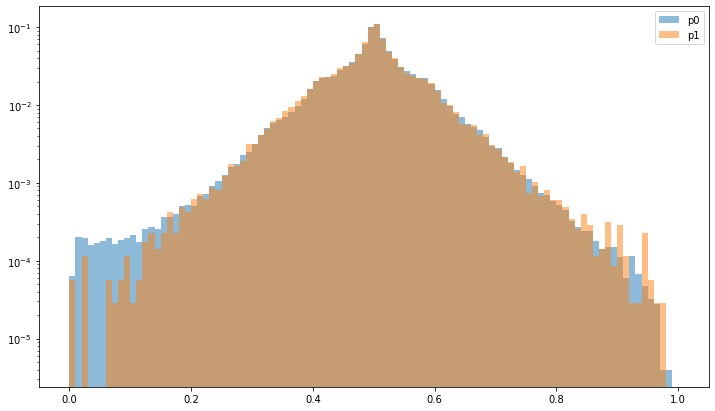

INFO:KDECopulaNNPdf:Maximum weight: 7.1428565881690576


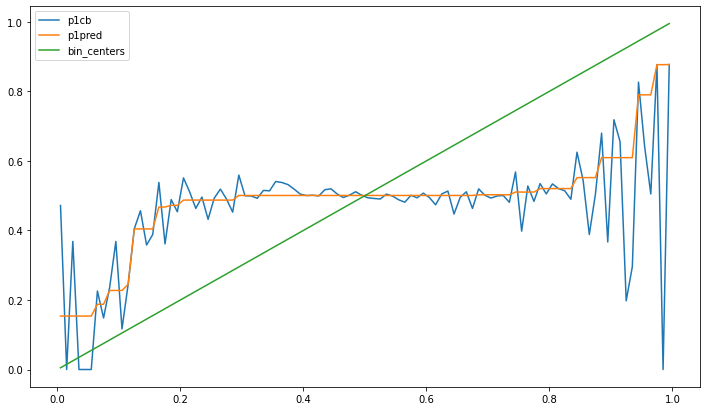

In [8]:
pdf._calibrate_classifier(pdf.hist_p0_, pdf.hist_p1_, pdf.bin_edges_, validation_plots=True)

In [9]:
pdf.max_weight_

7.1428565881690576

In [10]:
pdf.score(X2)

-249553.05383488102

In [11]:
p = pdf.pdf(X2)

In [12]:
logp = pdf.logpdf(X2) #, add_num=True, add_cat=False, add_nonlin=False)

In [13]:
# theoretical pdf values
rv = multivariate_normal([mux,muy], [[sigmax*sigmax,rho*sigmax*sigmay],[rho*sigmax*sigmay,sigmay*sigmay]])
p2 = rv.pdf(X2)

In [14]:
logp2 = np.log(p2)

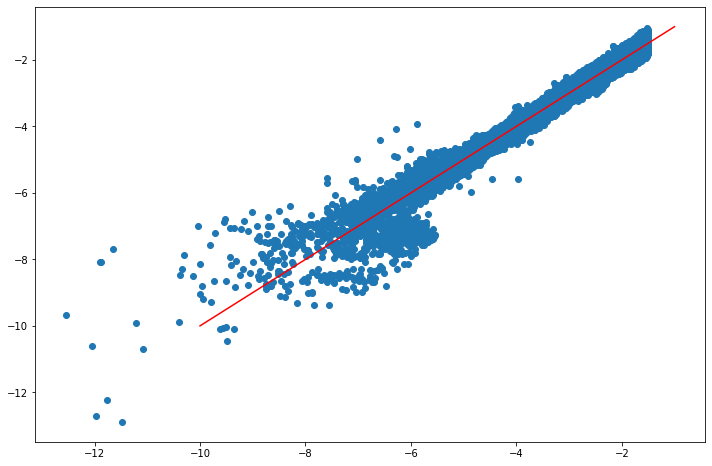

In [15]:
# compare the two
x = np.linspace(-10, -1, 100)
plt.figure(figsize=(12,8))
plt.plot(x,x, color='red')
plt.scatter(logp2, logp)

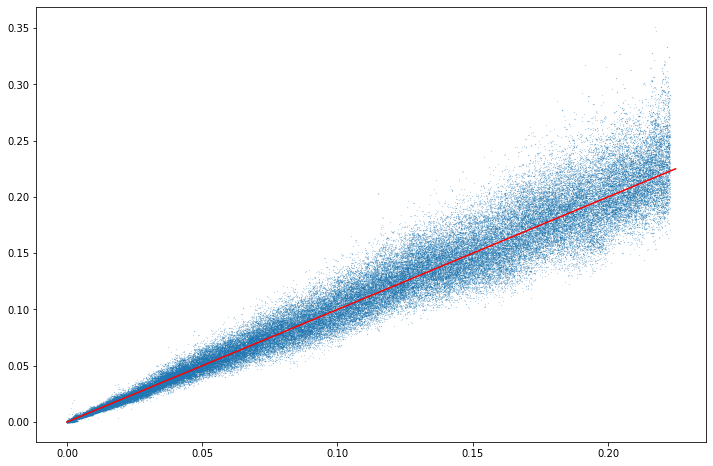

In [16]:
# compare the two
x = np.linspace(0, 0.225, 100)
plt.figure(figsize=(12,8))
plt.plot(x,x, color='red')
plt.scatter(p2, p, s=0.01)

In [17]:
dp = p-p2

In [18]:
np.mean(dp)

0.001919338716871509

In [19]:
np.std(dp)

0.016218002432948346